In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta 
from sklearn.preprocessing import StandardScaler
import json
from scipy import stats
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import os
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score

In [2]:
dataset = pd.read_csv("Motion data.csv", header=0)

In [3]:
dataset

,id,date,gyroX,gyroY,gyroZ,accelX,accelY,accelZ,activity,uuid
0,1,Mon Oct 25 2021,"[0, 499.664306640625, 499.8092651367187, 0.099...","[0, 1.25885009765625, 1.556396484375, 1.716613...","[0, 1.64031982421875, 1.38092041015625, 1.4953...","[0, 1.220703125, 1.1845703125, 1.185546875, 1....","[0, 1.1669921875, 1.14453125, 1.1640625, 1.186...","[0, 3.64453125, 3.673828125, 3.66796875, 3.655...",Working,NaN
1,2,Mon Oct 25 2021,"[0, 499.45068359375, 0.30517578125, 0.12969970...","[0, 2.02178955078125, 2.3193359375, 1.54876708...","[0, 1.4495849609375, 1.91497802734375, 1.76239...","[0, 0.4560546875, 0.4501953125, 0.4443359375, ...","[0, 13.169921875, 13.1591796875, 13.1767578125...","[0, 2.6796875, 2.6953125, 2.630859375, 2.66308...",Working,NaN
2,3,Mon Oct 25 2021,"[0, 499.969482421875, 0.2288818359375, 499.931...","[0, 1.01470947265625, 0.6866455078125, 1.73950...","[0, 1.45721435546875, 1.6632080078125, 1.48773...","[0, 0.5498046875, 0.6025390625, 0.568359375, 0...","[0, 15.5771484375, 15.5791015625, 15.58984375,...","[0, 3.904296875, 3.85546875, 3.93359375, 3.899...",Working,NaN
3,4,Mon Oct 25 2021,"[0, 496.673583984375, 486.8316650390625, 478.0...","[0, 25.115966796875, 39.9169921875, 498.283386...","[0, 493.01910400390625, 497.29156494140625, 49...","[0, 1.6650390625, 1.0244140625, 1.0927734375, ...","[0, 1.4375, 1.4013671875, 1.046875, 0.60253906...","[0, 3.4765625, 3.51953125, 3.548828125, 4.0439...",Working,NaN
4,6,Mon Oct 25 2021,"[0, 499.22943115234375, 499.5574951171875, 0.0...","[0, 4.63104248046875, 7.05718994140625, 4.6234...","[0, 0.6561279296875, 1.88446044921875, 2.47192...","[0, 1.3173828125, 1.3486328125, 1.3134765625, ...","[0, 1.1796875, 1.1953125, 1.166015625, 1.14746...","[0, 3.6904296875, 3.6669921875, 3.662109375, 3...",Working,NaN
5,7,Mon Oct 25 2021,"[0, 499.8779296875, 498.7640380859375, 498.435...","[0, 1.53350830078125, 499.3133544921875, 0.610...","[0, 1.007080078125, 3.11279296875, 1.342773437...","[0, 0.638671875, 0.67578125, 0.611328125, 0.57...","[0, 2.4521484375, 2.39453125, 2.435546875, 2.3...","[0, 3.1640625, 3.1787109375, 3.154296875, 3.20...",Walking,NaN
6,9,Mon Oct 25 2021,"[0, 7.110595703125, 6.40869140625, 0.373840332...","[0, 471.1761474609375, 489.68505859375, 472.83...","[0, 6.49261474609375, 30.1666259765625, 54.016...","[0, 2.1142578125, 2.310546875, 1.6328125, 0.08...","[0, 12.9677734375, 12.875, 12.6318359375, 12.8...","[0, 13.37890625, 13.0986328125, 12.853515625, ...",Running,NaN
7,11,Mon Oct 25 2021,"[0, 498.5809326171875, 498.2757568359375, 498....","[0, 2.5177001953125, 1.1749267578125, 1.266479...","[0, 0.457763671875, 0.20599365234375, 0.267028...","[0, 15.587890625, 15.5869140625, 15.607421875,...","[0, 0.359375, 0.369140625, 0.369140625, 0.3613...","[0, 4.3134765625, 4.2939453125, 4.2998046875, ...",Working,NaN
8,13,Mon Oct 25 2021,"[0, 15.625, 458.77838134765625, 486.7935180664...","[0, 145.22552490234375, 51.727294921875, 302.9...","[0, 250, 364.3798828125, 88.40179443359375, 20...","[0, 5.5693359375, 2.4228515625, 15.2216796875,...","[0, 9.6474609375, 11.8662109375, 12.0576171875...","[0, 1.1650390625, 14.9072265625, 12.0732421875...",Running,NaN
9,15,Mon Oct 25 2021,"[0, 499.77874755859375, 499.8016357421875, 499...","[0, 0.457763671875, 0.42724609375, 0.396728515...","[0, 499.176025390625, 499.4430541992187, 499.4...","[0, 0.111328125, 0.1064453125, 0.11328125, 0.0...","[0, 0.1611328125, 0.154296875, 0.158203125, 0....","[0, 4.0771484375, 4.0576171875, 4.0634765625, ...",Lying Down,NaN


## Data Cleaning

In [4]:
#Group all datasets by activity 
working_Df = dataset[dataset.activity == 'Working']
running_Df = dataset[dataset.activity == 'Running']
walking_Df = dataset[dataset.activity == 'Walking']
lying_down_Df = dataset[dataset.activity == 'Lying Down']

In [5]:
working_Df

,id,date,gyroX,gyroY,gyroZ,accelX,accelY,accelZ,activity,uuid
0,1,Mon Oct 25 2021,"[0, 499.664306640625, 499.8092651367187, 0.099...","[0, 1.25885009765625, 1.556396484375, 1.716613...","[0, 1.64031982421875, 1.38092041015625, 1.4953...","[0, 1.220703125, 1.1845703125, 1.185546875, 1....","[0, 1.1669921875, 1.14453125, 1.1640625, 1.186...","[0, 3.64453125, 3.673828125, 3.66796875, 3.655...",Working,NaN
1,2,Mon Oct 25 2021,"[0, 499.45068359375, 0.30517578125, 0.12969970...","[0, 2.02178955078125, 2.3193359375, 1.54876708...","[0, 1.4495849609375, 1.91497802734375, 1.76239...","[0, 0.4560546875, 0.4501953125, 0.4443359375, ...","[0, 13.169921875, 13.1591796875, 13.1767578125...","[0, 2.6796875, 2.6953125, 2.630859375, 2.66308...",Working,NaN
2,3,Mon Oct 25 2021,"[0, 499.969482421875, 0.2288818359375, 499.931...","[0, 1.01470947265625, 0.6866455078125, 1.73950...","[0, 1.45721435546875, 1.6632080078125, 1.48773...","[0, 0.5498046875, 0.6025390625, 0.568359375, 0...","[0, 15.5771484375, 15.5791015625, 15.58984375,...","[0, 3.904296875, 3.85546875, 3.93359375, 3.899...",Working,NaN
3,4,Mon Oct 25 2021,"[0, 496.673583984375, 486.8316650390625, 478.0...","[0, 25.115966796875, 39.9169921875, 498.283386...","[0, 493.01910400390625, 497.29156494140625, 49...","[0, 1.6650390625, 1.0244140625, 1.0927734375, ...","[0, 1.4375, 1.4013671875, 1.046875, 0.60253906...","[0, 3.4765625, 3.51953125, 3.548828125, 4.0439...",Working,NaN
4,6,Mon Oct 25 2021,"[0, 499.22943115234375, 499.5574951171875, 0.0...","[0, 4.63104248046875, 7.05718994140625, 4.6234...","[0, 0.6561279296875, 1.88446044921875, 2.47192...","[0, 1.3173828125, 1.3486328125, 1.3134765625, ...","[0, 1.1796875, 1.1953125, 1.166015625, 1.14746...","[0, 3.6904296875, 3.6669921875, 3.662109375, 3...",Working,NaN
7,11,Mon Oct 25 2021,"[0, 498.5809326171875, 498.2757568359375, 498....","[0, 2.5177001953125, 1.1749267578125, 1.266479...","[0, 0.457763671875, 0.20599365234375, 0.267028...","[0, 15.587890625, 15.5869140625, 15.607421875,...","[0, 0.359375, 0.369140625, 0.369140625, 0.3613...","[0, 4.3134765625, 4.2939453125, 4.2998046875, ...",Working,NaN
10,16,Mon Oct 25 2021,"[0, 418.3425903320313, 341.43829345703125, 321...","[0, 27.28271484375, 34.149169921875, 470.06988...","[0, 20.5535888671875, 36.91864013671875, 43.39...","[0, 15.873046875, 0.0859375, 0.0185546875, 0.0...","[0, 3.97265625, 3.3330078125, 2.4326171875, 2....","[0, 1.8212890625, 1.6162109375, 2.2265625, 3.3...",Working,NaN
13,21,Tue Oct 26 2021,"[0, 499.77874755859375, 499.786376953125, 499....","[0, 499.79400634765625, 0.5035400390625, 0.381...","[0, 498.9471435546875, 499.12261962890625, 499...","[0, 1.8955078125, 1.8896484375, 1.9130859375, ...","[0, 1.427734375, 1.451171875, 1.43359375, 1.44...","[0, 3.2900390625, 3.29296875, 3.30078125, 3.29...",Working,54:6C:0E:53:44:1A
14,22,Tue Oct 26 2021,"[0, 499.42779541015625, 499.3362426757813, 0.0...","[0, 0.6103515625, 0.335693359375, 1.0528564453...","[0, 499.12261962890625, 498.687744140625, 499....","[0, 1.9873046875, 1.9853515625, 2.021484375, 1...","[0, 15.2568359375, 15.30859375, 15.275390625, ...","[0, 3.4326171875, 3.4052734375, 3.458984375, 3...",Working,54:6C:0E:53:44:1A
15,24,Tue Oct 26 2021,"[0, 25.62713623046875, 473.5031127929687, 498....","[0, 470.0164794921875, 469.1925048828125, 12.7...","[0, 489.1204833984375, 486.8698120117187, 2.24...","[0, 0.341796875, 0.388671875, 0.55859375, 0.46...","[0, 1.2763671875, 1.291015625, 1.2099609375, 1...","[0, 3.396484375, 4.015625, 3.5458984375, 3.546...",Working,F0:F8:F2:86:96:85


In [6]:
running_Df

,id,date,gyroX,gyroY,gyroZ,accelX,accelY,accelZ,activity,uuid
6,9,Mon Oct 25 2021,"[0, 7.110595703125, 6.40869140625, 0.373840332...","[0, 471.1761474609375, 489.68505859375, 472.83...","[0, 6.49261474609375, 30.1666259765625, 54.016...","[0, 2.1142578125, 2.310546875, 1.6328125, 0.08...","[0, 12.9677734375, 12.875, 12.6318359375, 12.8...","[0, 13.37890625, 13.0986328125, 12.853515625, ...",Running,NaN
8,13,Mon Oct 25 2021,"[0, 15.625, 458.77838134765625, 486.7935180664...","[0, 145.22552490234375, 51.727294921875, 302.9...","[0, 250, 364.3798828125, 88.40179443359375, 20...","[0, 5.5693359375, 2.4228515625, 15.2216796875,...","[0, 9.6474609375, 11.8662109375, 12.0576171875...","[0, 1.1650390625, 14.9072265625, 12.0732421875...",Running,NaN
19,28,Tue Oct 26 2021,"[0, 465.6829833984375, 10.162353515625, 440.96...","[0, 480.2932739257813, 475.89111328125, 468.81...","[0, 24.658203125, 165.56549072265625, 249.9923...","[0, 0.1630859375, 1.99609375, 4.7763671875, 7....","[0, 1.646484375, 2.6259765625, 3.5, 5.02246093...","[0, 0.1044921875, 15.8740234375, 15.203125, 14...",Running,F0:F8:F2:86:96:85
23,32,Tue Oct 26 2021,"[0, 35.1104736328125, 113.800048828125, 77.331...","[0, 9.46044921875, 451.69830322265625, 19.4091...","[0, 428.93218994140625, 24.92523193359375, 488...","[0, 2.4072265625, 2.3603515625, 2.9248046875, ...","[0, 0.6640625, 1.2373046875, 1.2509765625, 1.1...","[0, 3, 3.6279296875, 2.8583984375, 3.1875, 1.3...",Running,54:6C:0E:53:43:A8
25,34,Tue Oct 26 2021,"[0, 72.75390625, 122.79510498046876, 463.30261...","[0, 302.79541015625, 377.716064453125, 32.9360...","[0, 415.5426025390625, 396.9039916992187, 465....","[0, 14.7998046875, 15.4609375, 14.6201171875, ...","[0, 0.1279296875, 15.91015625, 0.8837890625, 2...","[0, 2.916015625, 0.4814453125, 0.505859375, 5....",Running,54:6C:0E:53:43:A8
26,36,Tue Oct 26 2021,"[0, 3.48663330078125, 494.384765625, 498.92425...","[0, 477.51617431640625, 468.28460693359375, 6....","[0, 0.40435791015625, 9.27734375, 3.0822753906...","[0, 3.1904296875, 3.1875, 3.2783203125, 3.5751...","[0, 15.97265625, 15.919921875, 15.853515625, 1...","[0, 14.083984375, 13.923828125, 13.8505859375,...",Running,54:6C:0E:53:44:1A
27,37,Tue Oct 26 2021,"[0, 1.4190673828125, 497.6654052734375, 497.56...","[0, 66.68853759765625, 83.45794677734375, 45.9...","[0, 493.9422607421875, 499.7100830078125, 496....","[0, 3.791015625, 3.9140625, 3.93359375, 3.7705...","[0, 0.0029296875, 0.1943359375, 0.2880859375, ...","[0, 15.376953125, 0.017578125, 0.3525390625, 0...",Running,54:6C:0E:53:44:1A
28,38,Tue Oct 26 2021,"[0, 486.0153198242187, 455.5206298828125, 374....","[0, 0.8392333984375, 130.27191162109375, 171.6...","[0, 436.2258911132813, 250, 250, 462.821960449...","[0, 7.6748046875, 7.999755859375, 7.9997558593...","[0, 5.48828125, 11.53125, 8, 13.95703125, 10.7...","[0, 14.779296875, 14.4716796875, 14.900390625,...",Running,54:6C:0E:53:44:1A


In [7]:
walking_Df

,id,date,gyroX,gyroY,gyroZ,accelX,accelY,accelZ,activity,uuid
5,7,Mon Oct 25 2021,"[0, 499.8779296875, 498.7640380859375, 498.435...","[0, 1.53350830078125, 499.3133544921875, 0.610...","[0, 1.007080078125, 3.11279296875, 1.342773437...","[0, 0.638671875, 0.67578125, 0.611328125, 0.57...","[0, 2.4521484375, 2.39453125, 2.435546875, 2.3...","[0, 3.1640625, 3.1787109375, 3.154296875, 3.20...",Walking,NaN
12,18,Tue Oct 26 2021,"[0, 472.26715087890625, 454.6051025390625, 487...","[0, 39.75677490234375, 22.5372314453125, 485.4...","[0, 382.3776245117187, 439.88037109375, 39.550...","[0, 4.431640625, 4.3427734375, 5.0859375, 3.75...","[0, 1.4013671875, 1.373046875, 1.48046875, 0.8...","[0, 15.09765625, 15.1484375, 14.96484375, 15.4...",Walking,F0:F8:F2:86:96:85
16,25,Tue Oct 26 2021,"[0, 483.07037353515625, 483.66546630859375, 49...","[0, 478.05023193359375, 412.53662109375, 455.9...","[0, 55.084228515625, 70.9075927734375, 51.3687...","[0, 1.29296875, 1.1435546875, 1.009765625, 1.1...","[0, 11.271484375, 12.357421875, 12.5673828125,...","[0, 0.7900390625, 0.8271484375, 0.5703125, 0.7...",Walking,54:6C:0E:53:44:1A
17,26,Tue Oct 26 2021,"[0, 20.0958251953125, 478.546142578125, 498.48...","[0, 23.96392822265625, 44.36492919921875, 31.7...","[0, 481.40716552734375, 469.512939453125, 469....","[0, 15.73046875, 15.40625, 14.724609375, 14.66...","[0, 3.6630859375, 3.5869140625, 3.306640625, 4...","[0, 14.0869140625, 14.2763671875, 14.4296875, ...",Walking,F0:F8:F2:86:96:85
18,27,Tue Oct 26 2021,"[0, 333.04595947265625, 439.0335083007813, 28....","[0, 443.6798095703125, 459.6633911132813, 496....","[0, 32.867431640625, 21.6522216796875, 107.757...","[0, 13.8037109375, 15.033203125, 0.2138671875,...","[0, 3.66796875, 2.8505859375, 2.994140625, 3.6...","[0, 14.8779296875, 15.830078125, 15.318359375,...",Walking,F0:F8:F2:86:96:85
20,29,Tue Oct 26 2021,"[448.28033447265625, 487.75482177734375, 59.51...","[478.8360595703125, 484.9700927734375, 19.0963...","[358.55865478515625, 483.1466674804687, 183.28...","[3.8671875, 3.849609375, 5.5751953125, 4.40820...","[1.236328125, 1.505859375, 1.748046875, 1.7402...","[15.287109375, 15.8681640625, 15.458984375, 15...",Walking,F0:F8:F2:86:96:85
22,31,Tue Oct 26 2021,"[0, 10.7879638671875, 490.3030395507813, 11.85...","[0, 478.1341552734375, 467.91839599609375, 485...","[0, 19.2108154296875, 1.007080078125, 7.354736...","[0, 15.369140625, 15.2568359375, 15.2490234375...","[0, 12.787109375, 12.255859375, 12.69140625, 1...","[0, 0.9560546875, 1.78515625, 1.0400390625, 1....",Walking,54:6C:0E:53:36:FC
24,33,Tue Oct 26 2021,"[0, 496.978759765625, 482.2540283203125, 477.9...","[0, 16.6015625, 3.1280517578125, 491.653442382...","[0, 38.79547119140625, 5.5999755859375, 488.05...","[0, 1.4169921875, 1.287109375, 1.0185546875, 1...","[0, 2.05078125, 1.76953125, 2.2900390625, 2.10...","[0, 2.697265625, 3.3154296875, 3.5556640625, 3...",Walking,54:6C:0E:53:43:A8
29,39,Tue Oct 26 2021,"[0, 39.61944580078125, 33.4320068359375, 9.307...","[0, 94.4366455078125, 58.34197998046875, 24.76...","[0, 383.1253051757813, 360.31341552734375, 393...","[0, 0.52734375, 0.51171875, 0.7080078125, 0.84...","[0, 11.2900390625, 11.908203125, 12.8310546875...","[0, 15.916015625, 15.583984375, 15.5224609375,...",Walking,54:6C:0E:53:44:1A
32,42,Wed Oct 27 2021,"[0, 4.49371337890625, 13.98468017578125, 8.232...","[0, 488.28125, 12.53509521484375, 0.4653930664...","[0, 14.19830322265625, 19.6533203125, 8.316040...","[0, 1.166015625, 1.3447265625, 1.32421875, 1.3...","[0, 14.4638671875, 14.6103515625, 14.39453125,...","[0, 3.95703125, 3.4697265625, 3.5859375, 3.911...",Walking,54:6C:0E:53:36:FC


In [8]:
lying_down_Df

,id,date,gyroX,gyroY,gyroZ,accelX,accelY,accelZ,activity,uuid
9,15,Mon Oct 25 2021,"[0, 499.77874755859375, 499.8016357421875, 499...","[0, 0.457763671875, 0.42724609375, 0.396728515...","[0, 499.176025390625, 499.4430541992187, 499.4...","[0, 0.111328125, 0.1064453125, 0.11328125, 0.0...","[0, 0.1611328125, 0.154296875, 0.158203125, 0....","[0, 4.0771484375, 4.0576171875, 4.0634765625, ...",Lying Down,NaN
11,17,Mon Oct 25 2021,"[0, 0.08392333984375, 0.08392333984375, 0.1068...","[0, 0.72479248046875, 0.762939453125, 0.633239...","[0, 499.1455078125, 499.2752075195313, 499.221...","[0, 12.044921875, 12.0302734375, 12.025390625,...","[0, 0.0986328125, 0.099609375, 0.1015625, 0.11...","[0, 0.2451171875, 0.2646484375, 0.2373046875, ...",Lying Down,NaN


In [9]:
#calculate number of each sets of activity
walking_count = len(walking_Df.index)
working_count = len(working_Df.index)
running_count = len(running_Df.index)
lying_down_count = len(lying_down_Df.index)

print("number of sets for walking: %d" % walking_count)
print("number of sets for working: %d" % working_count)
print("number of sets for running: %d" % running_count)
print("number of sets for lying down: %d" % lying_down_count)

number of sets for walking: 14
number of sets for working: 14
number of sets for running: 8
number of sets for lying down: 2


In [10]:
#drop data that are anomalous or lying down (id 13, 15, 17, 26, 30, 39)

def checkIfInList(lst, value):
    for item in lst:
        if item == value:
            return True 
    return False 

anomaly_index = [13, 26, 30, 39]
anomaly_lst_index = dataset[(dataset['id'] == 13) | (dataset['id'] == 15) | (dataset['id'] == 17) | (dataset['id'] == 26) | (dataset['id'] == 30) | (dataset['id'] == 39)].index
dataset_cleaned = dataset.drop(anomaly_lst_index)
dataset_cleaned

,id,date,gyroX,gyroY,gyroZ,accelX,accelY,accelZ,activity,uuid
0,1,Mon Oct 25 2021,"[0, 499.664306640625, 499.8092651367187, 0.099...","[0, 1.25885009765625, 1.556396484375, 1.716613...","[0, 1.64031982421875, 1.38092041015625, 1.4953...","[0, 1.220703125, 1.1845703125, 1.185546875, 1....","[0, 1.1669921875, 1.14453125, 1.1640625, 1.186...","[0, 3.64453125, 3.673828125, 3.66796875, 3.655...",Working,NaN
1,2,Mon Oct 25 2021,"[0, 499.45068359375, 0.30517578125, 0.12969970...","[0, 2.02178955078125, 2.3193359375, 1.54876708...","[0, 1.4495849609375, 1.91497802734375, 1.76239...","[0, 0.4560546875, 0.4501953125, 0.4443359375, ...","[0, 13.169921875, 13.1591796875, 13.1767578125...","[0, 2.6796875, 2.6953125, 2.630859375, 2.66308...",Working,NaN
2,3,Mon Oct 25 2021,"[0, 499.969482421875, 0.2288818359375, 499.931...","[0, 1.01470947265625, 0.6866455078125, 1.73950...","[0, 1.45721435546875, 1.6632080078125, 1.48773...","[0, 0.5498046875, 0.6025390625, 0.568359375, 0...","[0, 15.5771484375, 15.5791015625, 15.58984375,...","[0, 3.904296875, 3.85546875, 3.93359375, 3.899...",Working,NaN
3,4,Mon Oct 25 2021,"[0, 496.673583984375, 486.8316650390625, 478.0...","[0, 25.115966796875, 39.9169921875, 498.283386...","[0, 493.01910400390625, 497.29156494140625, 49...","[0, 1.6650390625, 1.0244140625, 1.0927734375, ...","[0, 1.4375, 1.4013671875, 1.046875, 0.60253906...","[0, 3.4765625, 3.51953125, 3.548828125, 4.0439...",Working,NaN
4,6,Mon Oct 25 2021,"[0, 499.22943115234375, 499.5574951171875, 0.0...","[0, 4.63104248046875, 7.05718994140625, 4.6234...","[0, 0.6561279296875, 1.88446044921875, 2.47192...","[0, 1.3173828125, 1.3486328125, 1.3134765625, ...","[0, 1.1796875, 1.1953125, 1.166015625, 1.14746...","[0, 3.6904296875, 3.6669921875, 3.662109375, 3...",Working,NaN
5,7,Mon Oct 25 2021,"[0, 499.8779296875, 498.7640380859375, 498.435...","[0, 1.53350830078125, 499.3133544921875, 0.610...","[0, 1.007080078125, 3.11279296875, 1.342773437...","[0, 0.638671875, 0.67578125, 0.611328125, 0.57...","[0, 2.4521484375, 2.39453125, 2.435546875, 2.3...","[0, 3.1640625, 3.1787109375, 3.154296875, 3.20...",Walking,NaN
6,9,Mon Oct 25 2021,"[0, 7.110595703125, 6.40869140625, 0.373840332...","[0, 471.1761474609375, 489.68505859375, 472.83...","[0, 6.49261474609375, 30.1666259765625, 54.016...","[0, 2.1142578125, 2.310546875, 1.6328125, 0.08...","[0, 12.9677734375, 12.875, 12.6318359375, 12.8...","[0, 13.37890625, 13.0986328125, 12.853515625, ...",Running,NaN
7,11,Mon Oct 25 2021,"[0, 498.5809326171875, 498.2757568359375, 498....","[0, 2.5177001953125, 1.1749267578125, 1.266479...","[0, 0.457763671875, 0.20599365234375, 0.267028...","[0, 15.587890625, 15.5869140625, 15.607421875,...","[0, 0.359375, 0.369140625, 0.369140625, 0.3613...","[0, 4.3134765625, 4.2939453125, 4.2998046875, ...",Working,NaN
10,16,Mon Oct 25 2021,"[0, 418.3425903320313, 341.43829345703125, 321...","[0, 27.28271484375, 34.149169921875, 470.06988...","[0, 20.5535888671875, 36.91864013671875, 43.39...","[0, 15.873046875, 0.0859375, 0.0185546875, 0.0...","[0, 3.97265625, 3.3330078125, 2.4326171875, 2....","[0, 1.8212890625, 1.6162109375, 2.2265625, 3.3...",Working,NaN
12,18,Tue Oct 26 2021,"[0, 472.26715087890625, 454.6051025390625, 487...","[0, 39.75677490234375, 22.5372314453125, 485.4...","[0, 382.3776245117187, 439.88037109375, 39.550...","[0, 4.431640625, 4.3427734375, 5.0859375, 3.75...","[0, 1.4013671875, 1.373046875, 1.48046875, 0.8...","[0, 15.09765625, 15.1484375, 14.96484375, 15.4...",Walking,F0:F8:F2:86:96:85


## Data Formatting 

In [11]:
#function to break data to 30 timesteps 
X = []
y = []

def breakIntoChunks(lst, size, label):
    lst = lst.tolist()
    global X
    global y
    numChunks = int(len(lst) / size)
    for i in range(0, numChunks):
        firstIndex = 30 * i
        secondIndex = 30 * (i+1)
        chunk = lst[firstIndex: secondIndex]
        chunk = np.array(chunk)
        chunk = np.reshape(chunk, (-1, 6))
        X.append(chunk)
        y.append(label)
    return

In [12]:
#convert data into 30 timesteps (3s)
for index, row in dataset_cleaned.iterrows():
    
    #convert to list 
    gyroX_set = json.loads(row['gyroX'])
    gyroY_set = json.loads(row['gyroY'])
    gyroZ_set = json.loads(row['gyroZ'])
    accelX_set = json.loads(row['accelX'])
    accelY_set = json.loads(row['accelY'])
    accelZ_set = json.loads(row['accelZ'])
    
    #stack into an array
    row_data = np.vstack((gyroX_set, gyroY_set, gyroZ_set, accelX_set, accelY_set, accelZ_set)).transpose()
    
    breakIntoChunks(row_data, 30, row['activity'])

In [13]:
#to numpy
X_arr = np.array(X)
y_arr = np.array(y)

In [14]:
#check X shape 
X_arr.shape

(6441, 30, 6)

In [15]:
X_arr

array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [4.99664307e+02, 1.25885010e+00, 1.64031982e+00, 1.22070312e+00,
         1.16699219e+00, 3.64453125e+00],
        [4.99809265e+02, 1.55639648e+00, 1.38092041e+00, 1.18457031e+00,
         1.14453125e+00, 3.67382812e+00],
        ...,
        [4.99610901e+02, 1.38854980e+00, 1.59454346e+00, 1.20800781e+00,
         1.18554688e+00, 3.65234375e+00],
        [1.52587891e-02, 2.32696533e+00, 1.85394287e+00, 1.16796875e+00,
         1.16210938e+00, 3.67382812e+00],
        [4.99694824e+02, 1.95312500e+00, 1.47247314e+00, 1.19824219e+00,
         1.17773438e+00, 3.68945312e+00]],

       [[4.99137878e+02, 2.97546387e+00, 1.57928467e+00, 1.17968750e+00,
         1.18066406e+00, 3.68652344e+00],
        [4.99755859e+02, 1.02996826e+00, 1.02996826e+00, 1.23535156e+00,
         1.16796875e+00, 3.68066406e+00],
        [4.99862671e+02, 7.93457031e-01, 1.81579590e+00, 1.182617

In [16]:
#check y shape
y_arr.shape

(6441,)

In [17]:
def reduceSamplingFrequency(factor, X):
    newX = []
    totalIndex = X.shape[1]
    dropIndexes = [i for i in range (totalIndex) if i%factor != 0]
    
    #modify x 
    for chunk in X:
        chunk_half = np.delete(chunk, dropIndexes, 0)
        newX.append(chunk_half)
    
    return newX

In [18]:
X_arr = np.array(reduceSamplingFrequency(10, X_arr))

In [19]:
X_arr.shape

(6441, 3, 6)

## Model development

In [20]:
#split with train test split 
trainvalX, testX, trainvalY, testY = train_test_split(X_arr, y_arr, test_size=0.1, random_state = 42)

In [21]:
trainX, valX, trainY, valY = train_test_split(trainvalX, trainvalY, test_size=0.15, random_state=42)

In [22]:
#test shape
print("trainX shape")
print(trainX.shape)
print("trainY shape")
print(trainY.shape)
print("valX shape")
print(valX.shape)
print("valY shape")
print(valY.shape)
print("testX shape")
print(testX.shape)
print("testY shape")
print(testY.shape)

trainX shape
(4926, 3, 6)
trainY shape
(4926,)
valX shape
(870, 3, 6)
valY shape
(870,)
testX shape
(645, 3, 6)
testY shape
(645,)


In [23]:
#one hot encoder 

#reshape array
reshape_trainY = trainY.reshape(len(trainY), 1)
reshape_valY = valY.reshape(len(valY), 1)
reshape_testY = testY.reshape(len(testY), 1)

encoder = OneHotEncoder(sparse=False).fit(reshape_trainY)
onehot_trainY = encoder.transform(reshape_trainY)
onehot_valY = encoder.transform(reshape_valY)
onehot_testY = encoder.transform(reshape_testY)

In [24]:
onehot_trainY

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [25]:
onehot_valY

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

## LSTM 

In [30]:
model5 = models.Sequential()
model5.add(layers.LSTM(128, activation='tanh', input_shape=(3, 6), return_sequences=True))
model5.add(layers.LSTM(64, activation='tanh', return_sequences=True))
model5.add(layers.LSTM(32, activation='tanh'))
model5.add(layers.Dense(100, activation='relu'))
model5.add(layers.Dense(3, activation='softmax'))

In [31]:
model5.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 3, 128)            69120     
_________________________________________________________________
lstm_4 (LSTM)                (None, 3, 64)             49408     
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 303       
Total params: 134,547
Trainable params: 134,547
Non-trainable params: 0
_________________________________________________________________


In [32]:
adam = keras.optimizers.Adam(learning_rate=0.001)
model5.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [33]:
stopmodel = EarlyStopping(min_delta=0.001, patience=10)

In [34]:
learning_model5 = model5.fit(trainX, onehot_trainY, epochs=500, batch_size=32, validation_data=(valX, onehot_valY), callbacks=[stopmodel])

Epoch 1/500
154/154 [==============================] - 14s 35ms/step - loss: 0.4999 - accuracy: 0.7795 - val_loss: 0.3056 - val_accuracy: 0.8828oss: 0.5030 - accuracy: 0.
Epoch 2/500
154/154 [==============================] - 3s 22ms/step - loss: 0.2885 - accuracy: 0.8910 - val_loss: 0.2781 - val_accuracy: 0.8931
Epoch 3/500
154/154 [==============================] - 3s 17ms/step - loss: 0.2842 - accuracy: 0.8892 - val_loss: 0.2972 - val_accuracy: 0.8828
Epoch 4/500
154/154 [==============================] - 3s 16ms/step - loss: 0.2578 - accuracy: 0.8989 - val_loss: 0.2554 - val_accuracy: 0.9057
Epoch 5/500
154/154 [==============================] - 4s 26ms/step - loss: 0.2422 - accuracy: 0.9084 - val_loss: 0.2821 - val_accuracy: 0.8920
Epoch 6/500
154/154 [==============================] - 3s 20ms/step - loss: 0.2292 - accuracy: 0.9145 - val_loss: 0.2378 - val_accuracy: 0.9138
Epoch 7/500
154/154 [==============================] - 3s 20ms/step - loss: 0.2263 - accuracy: 0.9182 - val_l

In [44]:
model5.save('LSTM_frequencytenth')

INFO:tensorflow:Assets written to: LSTM_frequencytenth\assets


INFO:tensorflow:Assets written to: LSTM_frequencytenth\assets


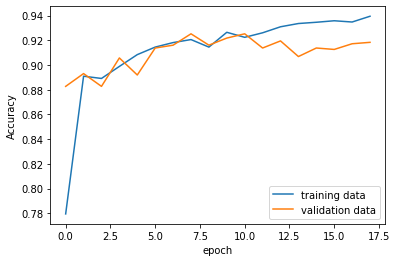

In [36]:
plt.plot(learning_model5.history['accuracy'])
plt.plot(learning_model5.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [37]:
def mapResultsToOneHot(results):
    output = []
    for vector in results:
        vector_lst = vector.tolist()
        max_Index = vector_lst.index(max(vector_lst))
        onehot_vector = []
        for i in range(0, len(vector_lst)):
            if i == max_Index:
                onehot_vector.append(1)
            else:
                onehot_vector.append(0)
        output.append(onehot_vector)
    return output

In [38]:
#evaluate performance 

#training set 
trainPredict5 = model5.predict(trainX)
trainPredict5 = mapResultsToOneHot(trainPredict5)
trainPredict5 = encoder.inverse_transform(trainPredict5)
trainPredict5 = trainPredict5.reshape(-1,)
trainAccuracy5 = accuracy_score(trainY, trainPredict5)
print("Accuracy of training set %f" % trainAccuracy5)

#validation set 
valPredict5 = model5.predict(valX)
valPredict5 = mapResultsToOneHot(valPredict5)
valPredict5 = encoder.inverse_transform(valPredict5)
valPredict5 = valPredict5.reshape(-1,)
valAccuracy5 = accuracy_score(valY, valPredict5)
print("Accuracy of validation set %f" % valAccuracy5)

Accuracy of training set 0.942956
Accuracy of validation set 0.918391


In [39]:
def findIndexes(lst, value):
    indexlst = []
    for i in range(0, len(lst)):
        if lst[i] == value:
            indexlst.append(i)
    return indexlst

In [40]:
def getValuesByIndexes(lst, indexlst):
    output = []
    for order in indexlst:
        output.append(lst[order])
    return output

In [41]:
def evaluateAccuracyByClass(truth, predict, label):
    targetIndexes = findIndexes(truth, label)
    predictClass = getValuesByIndexes(predict, targetIndexes)
    truthClass = [label for i in range(0, len(targetIndexes))]
    classScore = accuracy_score(truthClass, predictClass)
    print("Accuracy for %s: %f out of %d instances" % (label, classScore, len(targetIndexes)))

In [42]:
#accuracy by class for training set 
evaluateAccuracyByClass(trainY, trainPredict5,'Working')
evaluateAccuracyByClass(trainY, trainPredict5,'Walking')
evaluateAccuracyByClass(trainY, trainPredict5,'Running')

Accuracy for Working: 0.970899 out of 2268 instances
Accuracy for Walking: 0.899451 out of 1820 instances
Accuracy for Running: 0.961814 out of 838 instances


In [43]:
#accuracy by class for validation set set 
evaluateAccuracyByClass(valY, valPredict5,'Working')
evaluateAccuracyByClass(valY, valPredict5,'Walking')
evaluateAccuracyByClass(valY, valPredict5,'Running')

Accuracy for Working: 0.962963 out of 405 instances
Accuracy for Walking: 0.864780 out of 318 instances
Accuracy for Running: 0.911565 out of 147 instances
